# Process the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
# 21,597 entires with null values in the waterfront, view, and yr_renovated columns.

In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


---

# Exploratory Data Analysis

In [5]:
# Remove rows from the sqft_basement column with a '?' entry (this removes 454 rows)
df = df[df.sqft_basement != '?']

# Convert the sqft_basement column to an int data type, need to convert to float first
df.sqft_basement = df.sqft_basement.astype(float).astype(int)

# Drop rows in the waterfront column with NAN entries
df.dropna(subset = ['waterfront'], inplace = True)

In [6]:
# Create a dataframe for variables used for the model

# Drop irrelevant columns
# id
# date
# view
# lat/long
# sqft_living15/sqft_lot15'
df_data = df.drop(columns=['id', 'date', 'view', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])

# Create a living_density column that compares the living area to the lot area
df_data['living_density'] = df_data.sqft_living / df_data.sqft_lot

df_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,living_density
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400,1951,1991.0,98125,0.354874
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0,1933,NaN,98028,0.077000
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910,1965,0.0,98136,0.392000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0,1987,0.0,98074,0.207921
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530,2001,0.0,98053,0.053174


In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 1 to 21596
Data columns (total 15 columns):
price             18804 non-null float64
bedrooms          18804 non-null int64
bathrooms         18804 non-null float64
sqft_living       18804 non-null int64
sqft_lot          18804 non-null int64
floors            18804 non-null float64
waterfront        18804 non-null float64
condition         18804 non-null int64
grade             18804 non-null int64
sqft_above        18804 non-null int64
sqft_basement     18804 non-null int64
yr_built          18804 non-null int64
yr_renovated      15474 non-null float64
zipcode           18804 non-null int64
living_density    18804 non-null float64
dtypes: float64(6), int64(9)
memory usage: 2.3 MB


In [8]:
df_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,living_density
count,1.880400e+04,18804.000000,18804.000000,18804.000000,1.880400e+04,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,15474.000000,18804.000000,18804.000000
mean,5.418399e+05,3.374388,2.117541,2083.155499,1.509805e+04,1.494522,0.007552,3.410019,7.661615,1791.997713,291.157786,1971.068868,81.657684,98077.631780,0.323421
std,3.730331e+05,0.927297,0.769623,923.070881,4.102504e+04,0.539777,0.086573,0.650183,1.177350,832.378323,442.758076,29.320879,395.416206,53.481088,0.269304
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,0.000610
25%,3.215000e+05,3.000000,1.750000,1430.000000,5.048000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,0.156290
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.629500e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,0.247225
75%,6.436125e+05,4.000000,2.500000,2550.000000,1.072075e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,0.405794
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,4.653846


### Checking for Outliers

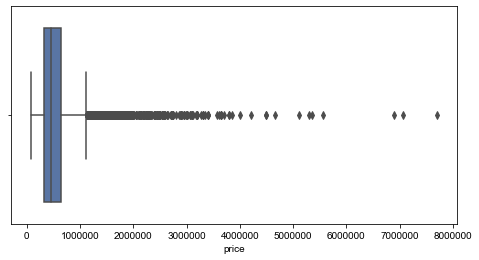

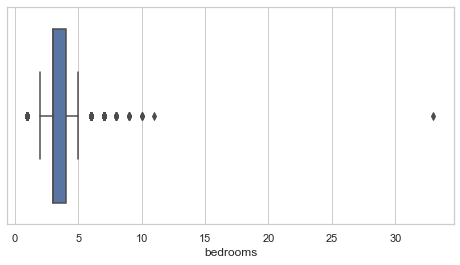

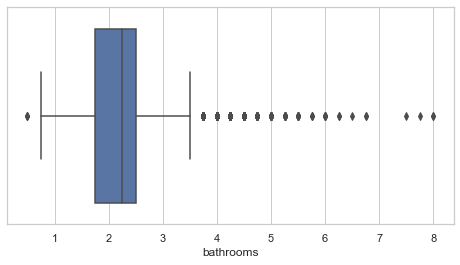

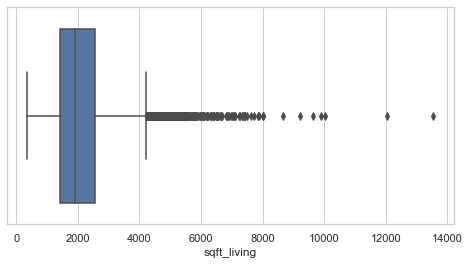

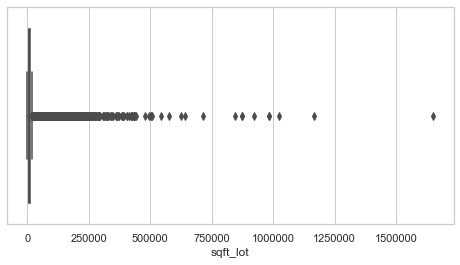

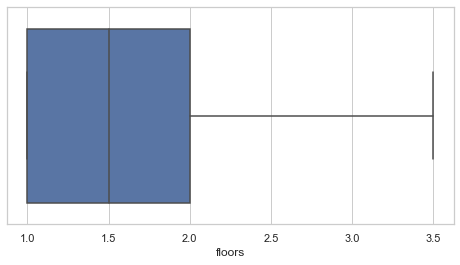

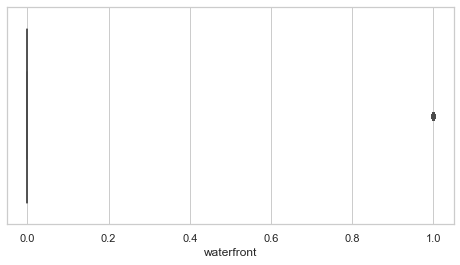

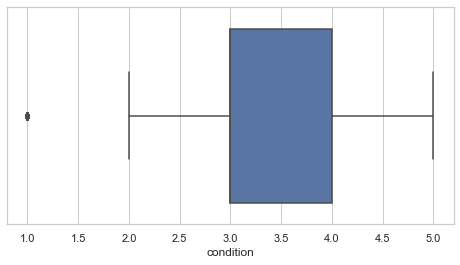

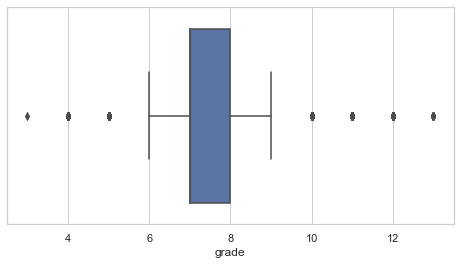

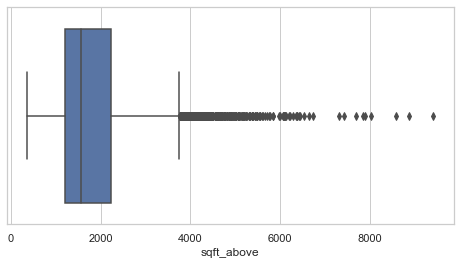

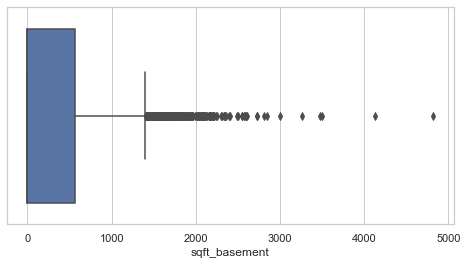

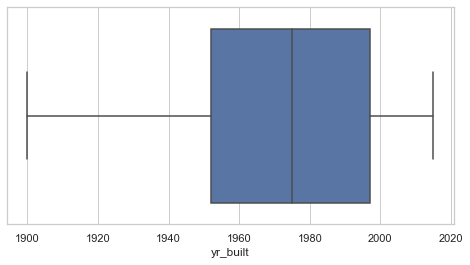

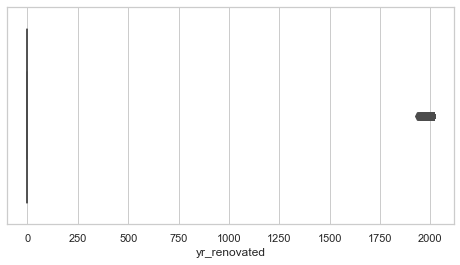

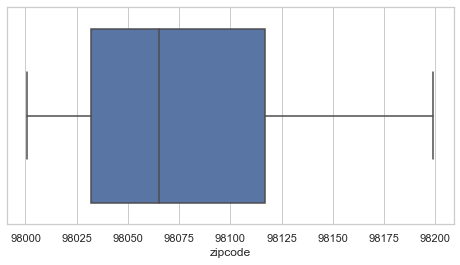

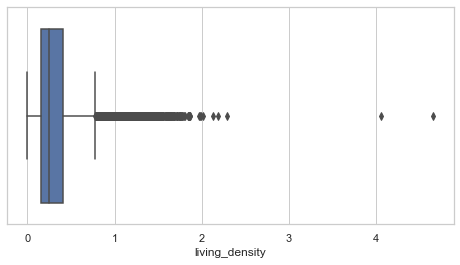

In [9]:
columns = df_data.columns

for column in columns:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set(style='whitegrid')
    sns.boxplot(df_data[column])

#### Bedrooms has an outlier. We decided to eliminate it. 

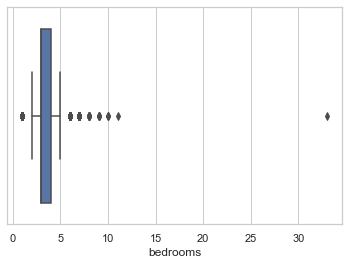

In [10]:
sns.set(style='whitegrid')
sns.boxplot(df_data['bedrooms'])

In [11]:
#locating the row of the bedroom outlier
df_data.loc[df_data['bedrooms']>30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,living_density
15856,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580,1947,0.0,98103,0.27


In [12]:
#dropping the row of the bedroom outlier
df_data.drop(index = 15856, inplace=True)

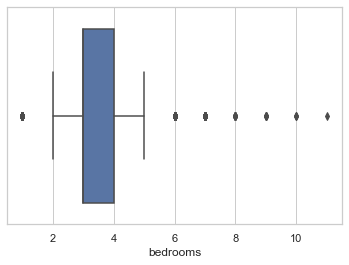

In [13]:
#replotting a box plot
sns.set(style='whitegrid')
sns.boxplot(df_data['bedrooms'])

#### sqft_lot has an outlier. We decided to keep this row. 

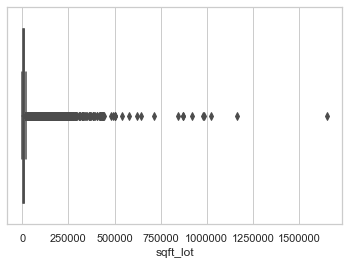

In [14]:
sns.boxplot(df_data['sqft_lot']);

In [15]:
max(df_data['sqft_lot'])

1651359

In [16]:
df_data.loc[df_data['sqft_lot']>1000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,living_density
1717,700000.0,4,1.0,1300,1651359,1.0,0.0,4,6,1300,0,1920,0.0,98022,0.000787
7762,855000.0,4,3.5,4030,1024068,2.0,0.0,3,10,4030,0,2006,0.0,98045,0.003935
17305,190000.0,2,1.0,710,1164794,1.0,0.0,2,5,710,0,1915,0.0,98014,0.000610


##### Checking latitude and longitude of largest lot

In [17]:
df_data.loc[df_data['sqft_lot']>1500000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,living_density
1717,700000.0,4,1.0,1300,1651359,1.0,0.0,4,6,1300,0,1920,0.0,98022,0.000787


Checked on google maps. This is a farm with a farm house. The latitude, longitude, and sf lot (equivalent to 37 acres) are accurate. Decided to keep in. 

---

## Split the Data  
80% of the data will be used for training the model, 20% will be used for testing the model.

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_data, test_size=0.2, random_state=12)
print(len(train_set), "train +", len(test_set), "test")

15042 train + 3761 test


In [19]:
train_set.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,living_density
2369,482000.0,3,1.75,2600,105587,1.0,0.0,4,7,1300,1300,1980,0.0,98070,0.024624
14760,1610000.0,4,2.75,5470,18200,2.0,1.0,3,11,3730,1740,1992,0.0,98118,0.300549


In [20]:
test_set.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,living_density
8073,118000.0,1,1.0,670,7957,1.0,0.0,4,6,670,0,1978,0.0,98038,0.084203
10890,729000.0,3,2.5,2440,4244,2.0,0.0,3,8,2440,0,2011,0.0,98052,0.574929


In [21]:
# Save the dataframes to csv files
train_set.to_csv('./train_set.csv', index=False)
test_set.to_csv('./test_set.csv', index=False)